In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t0 = np.load('train_4.npz')
for key in t0.keys():
    print(key)

images
labels
allow_pickle


In [7]:
x0 = t0['images']
y0 = t0['labels']
x0.shape

(5000, 28, 28)

4
5
4
5
1


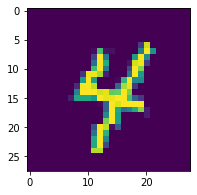

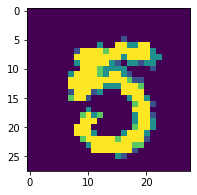

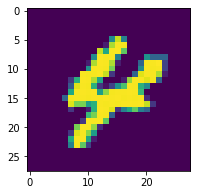

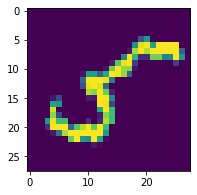

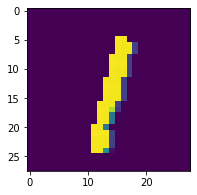

In [9]:
for i in np.random.randint(0,5000,5):
    plt.figure(figsize=[3,3])
    plt.imshow(x0[i])
    print(y0[i])

In [21]:
datax = []
datay = []
for i in range(5):
    datax.append(np.load('train_{}.npz'.format(i))['images'])
    datay.append(np.load('train_{}.npz'.format(i))['labels'])

In [22]:
x_train = np.concatenate(datax, axis=0)
y_train = np.concatenate(datay, axis=0)

In [23]:
x_test = np.load('test.npz'.format(i))['images']
y_test = np.load('test.npz'.format(i))['labels']

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (28, 28, 1)


# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (25000, 28, 28, 1)
25000 train samples
5000 test samples


In [25]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

Metal device set to: Apple M1 Pro


2022-12-15 09:43:11.316808: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-15 09:43:11.317535: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)



Epoch 1/15


2022-12-15 09:43:32.716399: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-15 09:43:32.998558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


176/176 [==============================] - 3s 11ms/step - loss: 2.2434 - accuracy: 0.2181 - val_loss: 1.9667 - val_accuracy: 0.5356
Epoch 2/15
  1/176 [..............................] - ETA: 1s - loss: 1.9063 - accuracy: 0.6250

2022-12-15 09:43:35.382361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


176/176 [==============================] - 2s 10ms/step - loss: 1.1796 - accuracy: 0.6924 - val_loss: 0.9181 - val_accuracy: 0.7072
Epoch 3/15
176/176 [==============================] - 2s 10ms/step - loss: 0.6882 - accuracy: 0.7926 - val_loss: 0.7723 - val_accuracy: 0.7464
Epoch 4/15
176/176 [==============================] - 2s 10ms/step - loss: 0.5748 - accuracy: 0.8247 - val_loss: 0.6850 - val_accuracy: 0.7716
Epoch 5/15
176/176 [==============================] - 2s 10ms/step - loss: 0.5133 - accuracy: 0.8441 - val_loss: 0.6333 - val_accuracy: 0.7852
Epoch 6/15
176/176 [==============================] - 2s 10ms/step - loss: 0.4749 - accuracy: 0.8556 - val_loss: 0.6023 - val_accuracy: 0.7984
Epoch 7/15
176/176 [==============================] - 2s 10ms/step - loss: 0.4427 - accuracy: 0.8662 - val_loss: 0.5604 - val_accuracy: 0.8148
Epoch 8/15
176/176 [==============================] - 2s 10ms/step - loss: 0.4171 - accuracy: 0.8753 - val_loss: 0.5317 - val_accuracy: 0.8220
Epoch 9/15